# GE 461 Introduction to Data Science 2024

# Dimensionality Reduction and Visulalization

## Question 1

### Görkem Kadir Solun 22003214

In this question, principal components analysis (PCA) is used to project the 784-dimensional
data onto lower dimensional subspaces to observe the effect of dimensionality on the performance
of the Gaussian classifier.


In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn import metrics

np.random.seed(666)

Notes
You may need to update the data path
You may need to update the figure sizes for pyplot


In [2]:
# Load the data
# NOTE: This data may need to be configured to the correct path
directory = os.getcwd()
data_path = os.path.join(directory, "data\\fashion_mnist_data.txt")
labels_path = os.path.join(directory, "data\\fashion_mnist_labels.txt")

# Figure size configuration
# NOTE: This is a global configuration for all figures, you may need to adjust this
# NOTE: This change is permanent and will be iterated and applied every time you run this script
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = fig_size[0] * 1.7
fig_size[1] = fig_size[1] * 1.7
plt.rcParams["figure.figsize"] = fig_size

data = np.loadtxt(data_path)
labels = np.loadtxt(labels_path)

print("Data shape: ", data.shape)
print("Labels shape: ", labels.shape)

Data shape:  (10000, 784)
Labels shape:  (10000,)


Split the data accordingly


In [3]:
# Split the data into training and testing sets
# We will use 50% of the data for training and 50% for testing,
# stratified by the labels to ensure that the training and testing sets have the same distribution of labels
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.5, stratify=labels, random_state=42
)

print("Training data shape: ", X_train.shape)
print("Training labels shape: ", y_train.shape)
print("Testing data shape: ", X_test.shape)
print("Testing labels shape: ", y_test.shape)
print("Unique labels: ", np.unique(y_train))
print("Number of unique labels: ", len(np.unique(y_train)))
print("Number of unique labels in test set: ", len(np.unique(y_test)))
print("Number of unique labels in training set: ", len(np.unique(y_train)))
print("Label distribution in training set: ", np.bincount(y_train.astype(int)))
print("Label distribution in test set: ", np.bincount(y_test.astype(int)))

Training data shape:  (5000, 784)
Training labels shape:  (5000,)
Testing data shape:  (5000, 784)
Testing labels shape:  (5000,)
Unique labels:  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Number of unique labels:  10
Number of unique labels in test set:  10
Number of unique labels in training set:  10
Label distribution in training set:  [500 500 500 500 500 500 500 500 500 500]
Label distribution in test set:  [500 500 500 500 500 500 500 500 500 500]


### 1.1 Centering the Data by Subtracting the Mean of the Whole Data From Each Sample


In [4]:
mean = np.mean(data, axis=0)

centered_data = data - mean
centered_X_train = X_train - mean
centered_X_test = X_test - mean

### 1.2 PCA

To better understand PCA, I applied it both manually and using a library.


Eigenvectors shape:  (784, 784)
Eigenvalues shape:  (784,)
Eigenvectors shape:  (784, 784)
Eigenvalues shape:  (784,)
Is manual eigenvalues equal to scikit-learn eigenvalues?  True


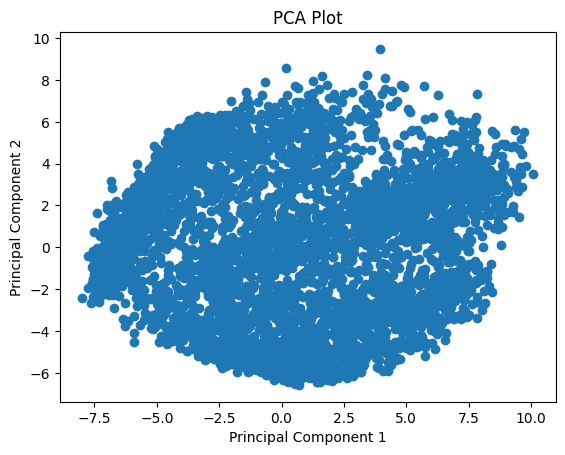

In [5]:
# Apply PCA manually to the training data
# Compute the covariance matrix
coveriance_matrix = np.cov(centered_X_train, rowvar=False)
# Compute the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(coveriance_matrix)

# Sort the eigenvectors by decreasing eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors.T[sorted_indices]

print("Eigenvectors shape: ", sorted_eigenvectors.shape)
print("Eigenvalues shape: ", sorted_eigenvalues.shape)

manual_eigenvalues = sorted_eigenvalues
manual_eigenvectors = sorted_eigenvectors

# Apply PCA to the training data using scikit-learn
pca = PCA()
pca.fit(centered_X_train)

# Extract the eigenvectors and eigenvalues
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Sort the eigenvectors by decreasing eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[sorted_indices]

print("Eigenvectors shape: ", sorted_eigenvectors.shape)
print("Eigenvalues shape: ", sorted_eigenvalues.shape)

# Check if the eigenvectors and eigenvalues computed manually are equal to those computed by scikit-learn
print(
    "Is manual eigenvalues equal to scikit-learn eigenvalues? ",
    np.allclose(manual_eigenvalues, sorted_eigenvalues),
)

# Project the training data onto the first two principal components to visualize the data
X_train_pca = pca.transform(centered_X_train)
X_test_pca = pca.transform(centered_X_test)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Plot")
plt.show()

Plotting the eigenvalues in descending order


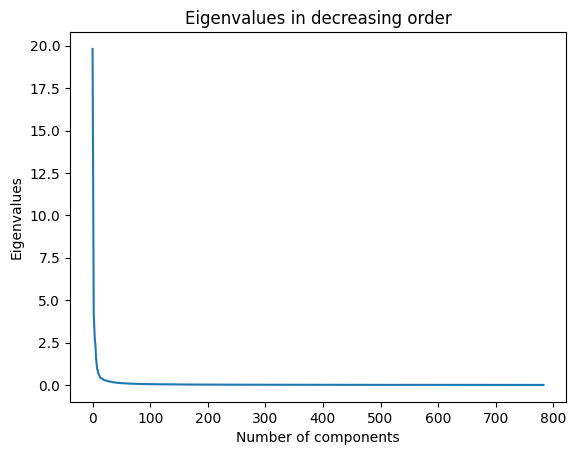

In [6]:
# Plot the eigenvalues in decreasing order
plt.figure()
plt.plot(sorted_eigenvalues)
plt.xlabel("Number of components")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues in decreasing order")
plt.show()

Plotting percentages of cumulative variance


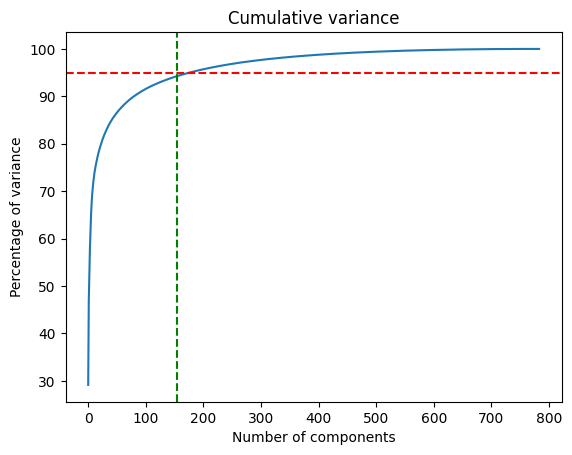

In [7]:
# Compute the cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100

# Plot the cumulative variance
x_axis = np.arange(1, len(cumulative_variance) + 1)
threshold = 95
plt.figure()
plt.plot(cumulative_variance)
plt.xlabel("Number of components")
plt.ylabel("Percentage of variance")
plt.title("Cumulative variance")
plt.axhline(y=threshold, color="r", linestyle="--")
plt.axvline(x=154, color="g", linestyle="--")
plt.show()

To get 95%, we roughly need 154 PCs.


### 1.3 Displaying the Sample Mean and Eigenvectors

Displaying the sample mean


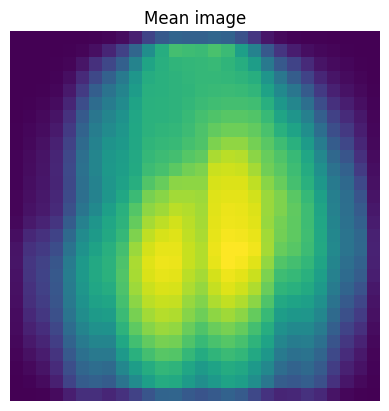

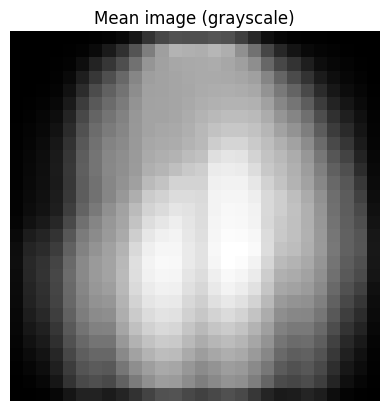

In [8]:
# Display the mean image, first color then grayscale
mean_image = mean.reshape(28, 28).T
plt.figure()
plt.axis("off")
plt.title("Mean image")
plt.imshow(mean_image)
plt.show()

# Grayscale
plt.figure()
plt.axis("off")
plt.title("Mean image (grayscale)")
plt.imshow(mean_image, cmap="gray")
plt.show()

Displaying eigenvectors

According to the cumulative variance graph, I chose 144 PCs. While the graph indicated 154, the differences beyond 144 were not significant enough to warrant the additional components. 144 is also a more convenient number to work with.


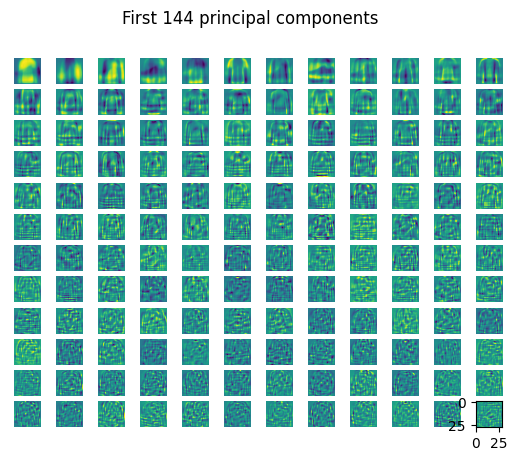

In [9]:
# Display the first 144 principal components as images
for i in range(12 * 12):
    eigenvector = sorted_eigenvectors[i].reshape(28, 28).T
    plt.axis("off")
    plt.subplot(12, 12, i + 1)
    plt.imshow(eigenvector)

plt.suptitle("First 144 principal components")
plt.show()

For a clearer view of the initial PCs, I'm also displaying the first 36.


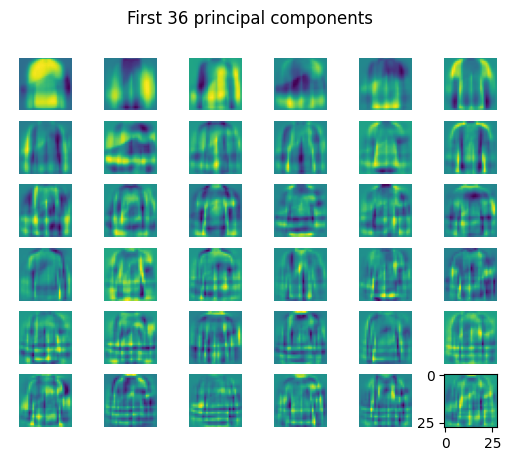

In [10]:
# Display the first 36 principal components as images
for i in range(6 * 6):
    eigenvector = sorted_eigenvectors[i].reshape(28, 28).T
    plt.axis("off")
    plt.subplot(6, 6, i + 1)
    plt.imshow(eigenvector)

plt.suptitle("First 36 principal components")
plt.show()

### 1.4 Training a Gaussian Classifier


In [11]:
def compute_classification_error(y_true, y_pred):
    return 1 - metrics.accuracy_score(y_true, y_pred)


# Errors
pca_errors_train_gnb = []
pca_errors_test_gnb = []
pca_errors_train_qda = []
pca_errors_test_qda = []

# The accuracy is calculated for 400 dimensions with a step of 10
dimensions = np.arange(10, 401, 10)
for dim in dimensions:
    # Apply PCA to the training and testing data using scikit-learn
    pca = PCA(n_components=dim)
    pca.fit(centered_X_train)

    X_train_pca = pca.transform(centered_X_train)
    X_test_pca = pca.transform(centered_X_test)

    # Train a Gaussian Naive Bayes classifier
    gnb = GaussianNB()
    gnb.fit(X_train_pca, y_train)

    # Predict the labels
    y_pred_train = gnb.predict(X_train_pca)
    y_pred_test = gnb.predict(X_test_pca)

    # Calculate the accuracy
    pca_errors_train_gnb.append(compute_classification_error(y_train, y_pred_train))
    pca_errors_test_gnb.append(compute_classification_error(y_test, y_pred_test))

    # Train a Quadratic Discriminant Analysis classifier
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train_pca, y_train)

    # Predict the labels
    y_pred_train = qda.predict(X_train_pca)
    y_pred_test = qda.predict(X_test_pca)

    # Calculate the accuracy
    pca_errors_train_qda.append(compute_classification_error(y_train, y_pred_train))
    pca_errors_test_qda.append(compute_classification_error(y_test, y_pred_test))

### 1.5 Plotting the Classification Error

##### Gaussian Naive Bayes Classifier Errors


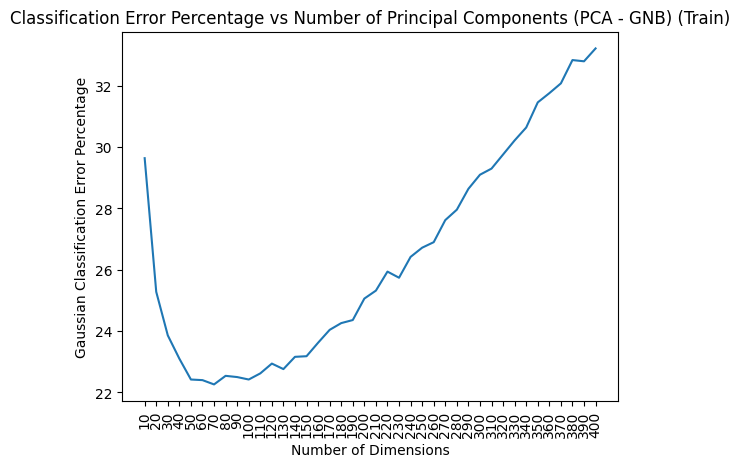

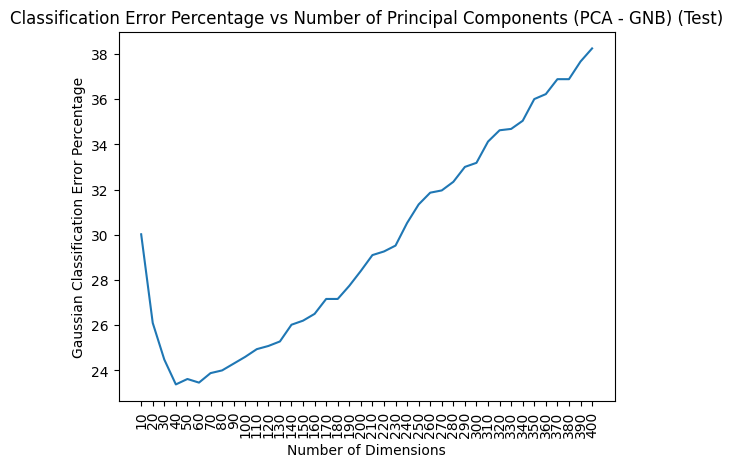

In [12]:
def plot_errors(
    errors_train, errors_test, title, xlabel, ylabel, dimensions=dimensions
):
    # Plot the errors of the training and testing data
    train_percentage_error = [error * 100 for error in errors_train]
    test_percentage_error = [error * 100 for error in errors_test]

    # Training percentage errors
    plt.figure()
    plt.plot(dimensions, train_percentage_error)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title + " (Train)")
    plt.xticks(dimensions, rotation=90)
    plt.show()

    # Testing percentage errors
    plt.figure()
    plt.plot(dimensions, test_percentage_error)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title + " (Test)")
    plt.xticks(dimensions, rotation=90)
    plt.show()


plot_errors(
    pca_errors_train_gnb,
    pca_errors_test_gnb,
    "Classification Error Percentage vs Number of Principal Components (PCA - GNB)",
    "Number of Dimensions",
    "Gaussian Classification Error Percentage",
)

##### Quadratic Discriminant Analysis Classifier Errors

Here, I also wanted to test it with QDA to see how much the results differ when covariance is included.


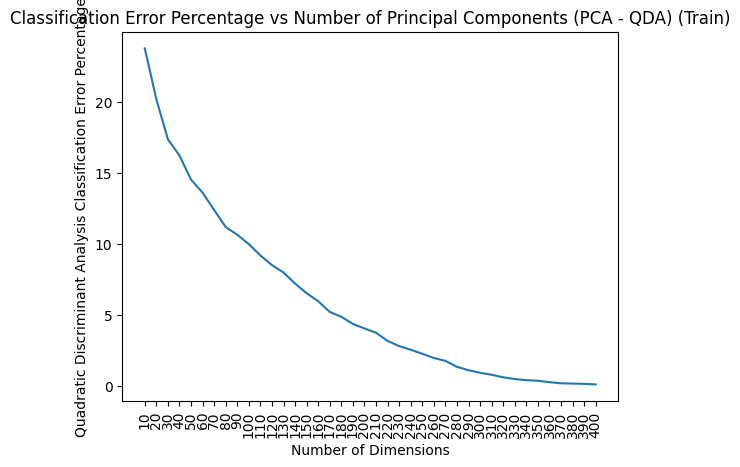

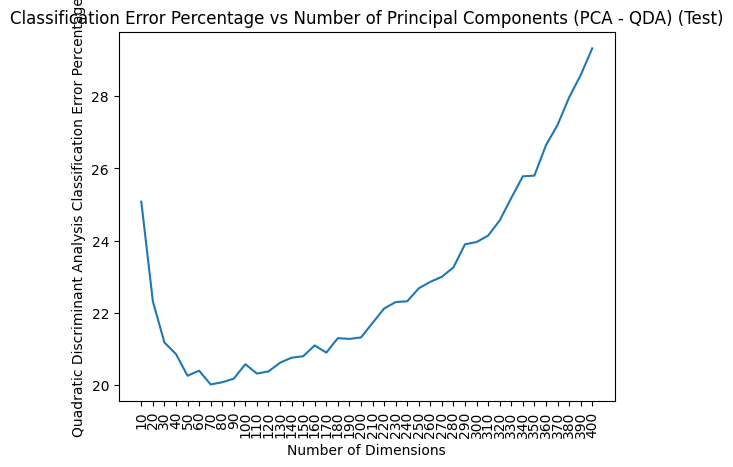

In [13]:
plot_errors(
    pca_errors_train_qda,
    pca_errors_test_qda,
    "Classification Error Percentage vs Number of Principal Components (PCA - QDA)",
    "Number of Dimensions",
    "Quadratic Discriminant Analysis Classification Error Percentage",
)

# Question 2


Using random projections as an alternative for dimensionality reduction.


### 2.4 Training a Gaussian Classifier and Projecting the Data Using a Random Matrix


In [ ]:
# Errors
random_errors_train_gnb = []
random_errors_test_gnb = []
random_errors_train_qda = []
random_errors_test_qda = []

# The accuracy is calculated for 400 dimensions with a step of 10
dimensions = np.arange(10, 401, 10)
for dim in dimensions:
    # Apply random projection to the training and testing data using scikit-learn
    rp = GaussianRandomProjection(n_components=dim)
    rp.fit(centered_X_train)

    X_train_rp = rp.transform(centered_X_train)
    X_test_rp = rp.transform(centered_X_test)

    # Train a Gaussian Naive Bayes classifier
    gnb = GaussianNB()
    gnb.fit(X_train_rp, y_train)

    # Predict the labels
    y_pred_train = gnb.predict(X_train_rp)
    y_pred_test = gnb.predict(X_test_rp)

    # Calculate the accuracy
    random_errors_train_gnb.append(compute_classification_error(y_train, y_pred_train))
    random_errors_test_gnb.append(compute_classification_error(y_test, y_pred_test))

    # Train a Quadratic Discriminant Analysis classifier
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train_rp, y_train)

    # Predict the labels
    y_pred_train = qda.predict(X_train_rp)
    y_pred_test = qda.predict(X_test_rp)

    # Calculate the accuracy
    random_errors_train_qda.append(compute_classification_error(y_train, y_pred_train))
    random_errors_test_qda.append(compute_classification_error(y_test, y_pred_test))

### Plotting the Classification Error

##### Gaussian Naive Bayes Classifier Errors

The first one is random; the second one is PCA.


In [ ]:
plot_errors(
    random_errors_train_gnb,
    random_errors_test_gnb,
    "Classification Error Percentage vs Number of Principal Components (Random Projection - GNB)",
    "Number of Dimensions",
    "Gaussian Classification Error Percentage",
)

plot_errors(
    pca_errors_train_gnb,
    pca_errors_test_gnb,
    "Classification Error Percentage vs Number of Principal Components (PCA - GNB)",
    "Number of Dimensions",
    "Gaussian Classification Error Percentage",
)

##### Quadratic Discriminant Analysis Classifier Errors

The first one is random; the second one is PCA.


In [ ]:
plot_errors(
    random_errors_train_qda,
    random_errors_test_qda,
    "Classification Error Percentage vs Number of Principal Components (Random Projection - QDA)",
    "Number of Dimensions",
    "Quadratic Discriminant Analysis Classification Error Percentage",
)

plot_errors(
    pca_errors_train_qda,
    pca_errors_test_qda,
    "Classification Error Percentage vs Number of Principal Components (PCA - QDA)",
    "Number of Dimensions",
    "Quadratic Discriminant Analysis Classification Error Percentage",
)

# Question 3

Isomap is used to map the 784-dimensional data onto lower dimensional manifolds.

### 3.1 & 3.2 Using Isomap


In [ ]:
# Defining new dimensions for the Isomap to reduce the number of dimensions to reduce the computational time
isomap_dimensions = np.arange(1, 401, 16)

def isomap_classification(n_neighbors, dimensions):
    # Errors
    errors_train_gnb = []
    errors_test_gnb = []
    errors_train_qda = []
    errors_test_qda = []

    # The accuracy is calculated for 400 dimensions with a step of 10
    for dim in dimensions:
        # Apply Isomap to the training and testing data using scikit-learn
        # The number of neighbors is set to n_neighbors
        print("Creating Isomap with ", dim, " dimensions")
        isomap = Isomap(n_components=dim, n_neighbors=n_neighbors)
        print("Fitting Isomap with ", dim, " dimensions")
        isomap.fit(centered_data)
        print("Transforming data")
        # isomap.fit(centered_X_train) # If you want to use only the training data
        X_train_isomap = isomap.transform(centered_X_train)
        X_test_isomap = isomap.transform(centered_X_test)

        # Train a Gaussian Naive Bayes classifier
        gnb = GaussianNB()
        gnb.fit(X_train_isomap, y_train)

        # Predict the labels
        y_pred_train = gnb.predict(X_train_isomap)
        y_pred_test = gnb.predict(X_test_isomap)

        # Calculate the accuracy
        errors_train_gnb.append(compute_classification_error(y_train, y_pred_train))
        errors_test_gnb.append(compute_classification_error(y_test, y_pred_test))

        # Train a Quadratic Discriminant Analysis classifier
        qda = QuadraticDiscriminantAnalysis()
        qda.fit(X_train_isomap, y_train)

        # Predict the labels
        y_pred_train = qda.predict(X_train_isomap)
        y_pred_test = qda.predict(X_test_isomap)

        # Calculate the accuracy
        errors_train_qda.append(compute_classification_error(y_train, y_pred_train))
        errors_test_qda.append(compute_classification_error(y_test, y_pred_test))

    return errors_train_gnb, errors_test_gnb, errors_train_qda, errors_test_qda

In [ ]:
# The number of neighbors is set to 5
errors_train_gnb, errors_test_gnb, errors_train_qda, errors_test_qda = (
    isomap_classification(5, isomap_dimensions)
)

### 3.3 Plotting the Errors

First plot with 5 neighbors


In [ ]:
plot_errors(
    errors_train_gnb,
    errors_test_gnb,
    "Classification Error Percentage vs Number of Isomap Components (GNB)",
    "Number of Dimensions",
    "Gaussian Classification Error Percentage",
    isomap_dimensions,
)

plot_errors(
    errors_train_qda,
    errors_test_qda,
    "Classification Error Percentage vs Number of Isomap Components (QDA)",
    "Number of Dimensions",
    "Quadratic Discriminant Analysis Classification Error Percentage",
    isomap_dimensions,
)

Second plot with 20 neighbors


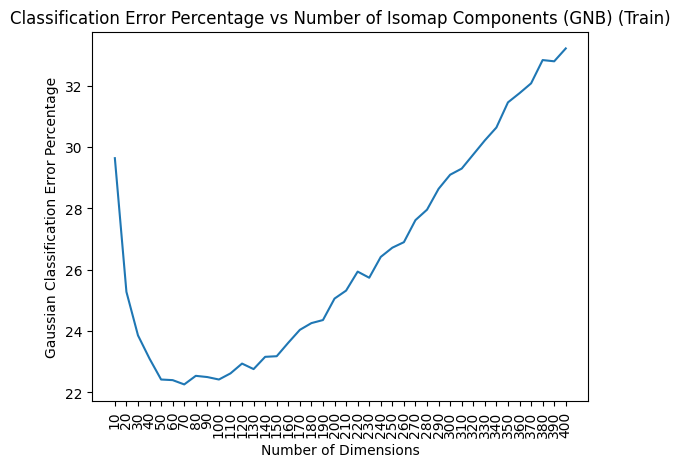

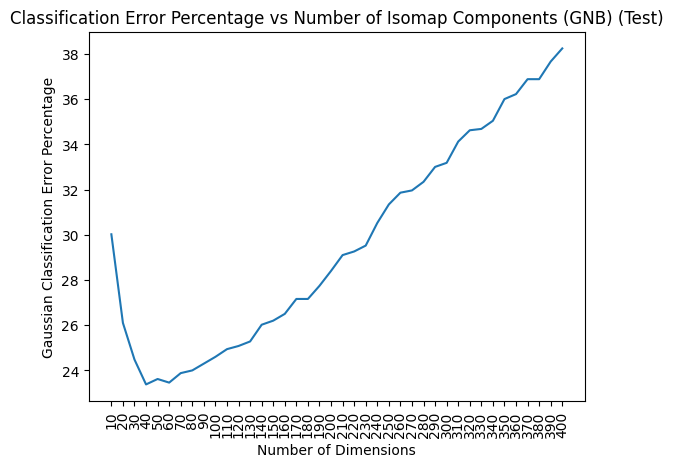

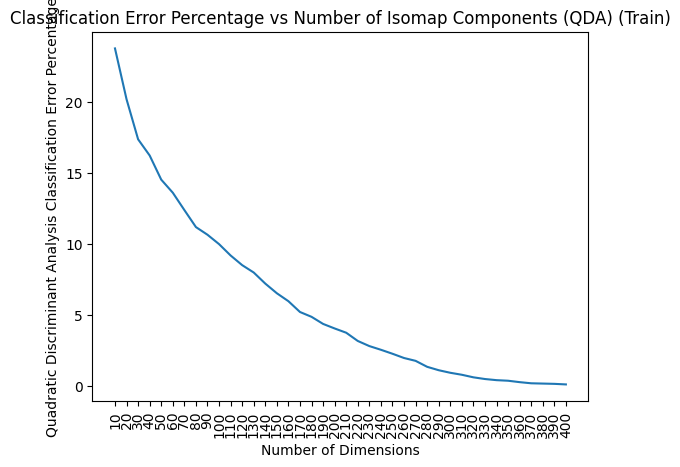

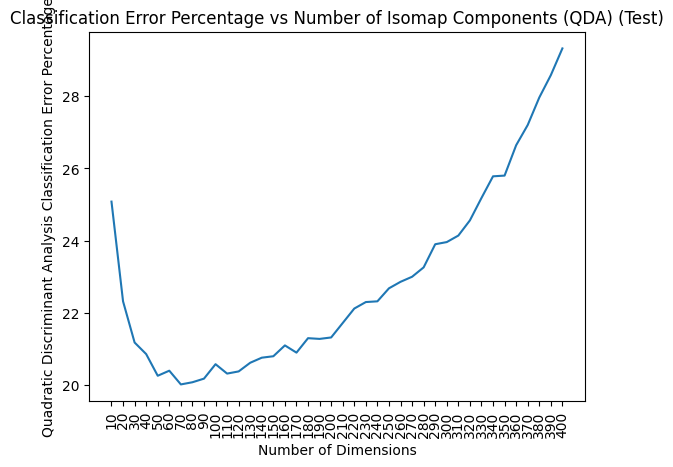

In [15]:
errors_train_gnb, errors_test_gnb, errors_train_qda, errors_test_qda = (
    isomap_classification(20, isomap_dimensions)
)

plot_errors(
    errors_train_gnb,
    errors_test_gnb,
    "Classification Error Percentage vs Number of Isomap Components (GNB)",
    "Number of Dimensions",
    "Gaussian Classification Error Percentage",
    isomap_dimensions,
)

plot_errors(
    errors_train_qda,
    errors_test_qda,
    "Classification Error Percentage vs Number of Isomap Components (QDA)",
    "Number of Dimensions",
    "Quadratic Discriminant Analysis Classification Error Percentage",
    isomap_dimensions,
)

# Question 4

Using t-SNE to map the dataset to two dimensions.

To explore the effects of key parameters on t-SNE results, I conducted experiments varying perplexity (10, 30, 50), iterations (1000, 3000), early exaggeration (300, 500), and initialization ('random', 'pca'). I chose these parameters due to their known influence on t-SNE embeddings, balancing this influence with computational limitations. But, there are other parameters exist such as learning_rate, angle, method...

##### Preparing and Plotting the t-SNE


In [ ]:
# Preparing and Plotting the t-SNE
def plot_t_SNE(initialization, iterations, n_iter_without_progress, perplexity):

    t_sne = TSNE(
        n_components=2,
        perplexity=perplexity,
        n_iter=iterations,

        init=initialization,
        n_iter_without_progress=n_iter_without_progress,
        random_state=42,
        n_jobs=-1,
    )

    data_transformed = t_sne.fit_transform(centered_data)

    colors = [
        "blue",
        "orange",
        "green",
        "red",
        "purple",
        "brown",
        "pink",
        "gray",
        "olive",
        "cyan",
    ]

    names = [
        "T-shirt/top",
        "trouser",
        "pullover",
        "dress",
        "coat",
        "sandal",
        "shirt",
        "sneaker",
        "bag",
        "ankle boot",
    ]

    plt.scatter(
        data_transformed[:, 0],
        data_transformed[:, 1],
        c=labels,
        cmap="tab10",
        alpha=0.5,
    )
    plt.legend(
        handles=[
            plt.Line2D(
                [0], [0], marker="o", color="w", label=names[i], markerfacecolor=c
            )
            for i, c in enumerate(colors)
        ],
        title="Labels",
        loc="upper right",
    )
    plt.title(
        "t-SNE Plot, perplexity = "
        + str(perplexity)
        + ", initialization = "
        + initialization
        + ", iterations = "
        + str(iterations)
        + ", n_iter_without_progress = "
        + str(n_iter_without_progress)
    )
    plt.show()

##### Iterations 1000 vs 3000

Initialization random, iterations 1000, iterations without progress 300, perplexity 30


In [ ]:
plot_t_SNE("random", 1000, 300, 30)

Initialization random, iterations 3000, iterations without progress 300, perplexity 30


In [ ]:
plot_t_SNE("random", 3000, 300, 30)

##### Iterations without progress 300 vs 500

Initialization random, iterations 3000, iterations without progress 300, perplexity 30


In [ ]:
plot_t_SNE("random", 3000, 300, 30)

Initialization random, iterations 3000, iterations without progress 500, perplexity 30


In [ ]:
plot_t_SNE("random", 3000, 500, 30)

##### Initialization random vs PCA

We can compare the one below with the one above.
Initialization pca, iterations 3000, iterations without progress 500, perplexity 30


In [ ]:
plot_t_SNE("pca", 3000, 500, 30)

##### Perplexity 5 vs 50

Initialization pca, iterations 3000, iterations without progress 500, perplexity 5


In [ ]:
plot_t_SNE("pca", 3000, 500, 5)

Initialization pca, iterations 3000, iterations without progress 500, perplexity 50


In [ ]:
plot_t_SNE("pca", 3000, 500, 50)